In [219]:
# This script is to take a CSV of specific format (illustrated below) and create figures from those data.
#  The data in the CSV should be either sweHybrid, swe, or melt.
#  Although the display/management of the data for all three types is pretty similar, MELT should be displayed
#  slightly differently than sweHybrid or swe.    Special MELT scripts will be written for this management
#
#
#    Each row should be a different pond.    There is no label for the ponds in the CSV the meta data should be
#        handled carefully there.
#    The first row is the date values
#    Each column is a new day   with the first row of each column being the date (in matlab dates cause hecc)
#
#    date, date, date, date
#    value_p1, value_p1, value_p1, value_p1
#    value_p2, value_p2, value_p2, value_p2
#    value_p3, value_p3, value_p3, value_p3
#
# Each value should be some combination of total melt across the area of the pond.  Either Sum, average, or 
#    Otherwise.   This script will have absolutly no vision into how those data are calculated so be smart.

In [220]:
import csv
import matplotlib.pyplot as plt
import math
import datetime
import pandas as pd

In [230]:
#This was copied from https://gist.github.com/victorkristof/b9d794fe1ed12e708b9d
# seemed legit but I havent actually checked their work.   I think it should do the trick tho
def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    days = datenum % 1
    return datetime.date.fromordinal(int(datenum)) \
           + datetime.timedelta(days=days) \
           - datetime.timedelta(days=366)

#The name of this function is intentionally obscure to limit it's use.   It is not very universal
# But it works for my initial 26 ponds assuming they are in a consistant order.   This is not garunteed for
# all ponds though so this method should be used VERY sparingly.   Mostly just creates my initial dataframes
# Gets the raw data from the CSV file and organizes it into a pandas df for later
#
def custom_function_that_is_specific_to_data_type(pond_df, raw_data_csv_file, raw_data_df, data_key):
    print('this function takes a while.... Sorry it has for loops')
    raw_pond_file = open(raw_data_csv_file)
    raw_pond_data_reader = csv.reader(raw_pond_file)
    for idx, row in enumerate(raw_pond_data_reader):
        if idx == 0:
            dates = list(map(datenum_to_datetime, 
                             list(map(float, row)))) #creates datetime list in python format
            continue
        site_data = list(map(float, row))
        site_id = pond_df['site_id'].iloc[idx-1]
        for date, site_value in zip(dates, site_data):
            temporary_dict = {"site_id": site_id, "date": date, data_key: site_value, 
                             "units": 'mm', "area_size_m": 500, 
                              "averaging_method": 'sum'}
            raw_data_df = raw_data_df.append(temporary_dict, ignore_index=True)
    return(raw_data_df)


 #temporary_dict = {"site_id": [site_id] * length, "date": dates, "value": site_data, 
 #                        "units": ['mm']*length, "area_size_m": [500]*length, 
 #                         "averaging_method": ['sum']*length}

In [223]:
# The meta data should ultimatly be included in the raw data file instead of two separate files...
swe_hybrid_raw_data_csv_file = "/Users/Cannon/Documents/School/UCSB/Briggs Lab/Thaw_Rate_Hypothesis/Raw Snow Melt Data (Bair et. Al) /Points_OF_Interest/Pond_csv_data/01-Dec-2023sweHybrid.csv"
melt_raw_data_csv = "/Users/Cannon/Documents/School/UCSB/Briggs Lab/Thaw_Rate_Hypothesis/Raw Snow Melt Data (Bair et. Al) /Points_OF_Interest/Pond_csv_data/04-Dec-2023melt.csv"
swe_raw_data_csv = "/Users/Cannon/Documents/School/UCSB/Briggs Lab/Thaw_Rate_Hypothesis/Raw Snow Melt Data (Bair et. Al) /Points_OF_Interest/Pond_csv_data/04-Dec-2023swe.csv"
pond_meta_data_csv = "/Users/Cannon/Documents/School/UCSB/Briggs Lab/Thaw_Rate_Hypothesis/Raw Snow Melt Data (Bair et. Al) /Points_OF_Interest/Initial_Ponds.csv"


In [240]:
# Save locations for dataframes formatted in a good way
save_swe_hybrid_raw_data_csv_file = "/Users/Cannon/Documents/School/UCSB/Briggs Lab/Thaw_Rate_Hypothesis/Raw Snow Melt Data (Bair et. Al) /Points_OF_Interest/DataFrame_CSV/dec_4_2023_sweHybrid.csv"
save_melt_raw_data_csv = "/Users/Cannon/Documents/School/UCSB/Briggs Lab/Thaw_Rate_Hypothesis/Raw Snow Melt Data (Bair et. Al) /Points_OF_Interest/DataFrame_CSV/dec_4_2023_swe.csv"
save_swe_raw_data_csv = "/Users/Cannon/Documents/School/UCSB/Briggs Lab/Thaw_Rate_Hypothesis/Raw Snow Melt Data (Bair et. Al) /Points_OF_Interest/DataFrame_CSV/dec_4_2023_melt.csv"
save_pond_meta_data_csv = "/Users/Cannon/Documents/School/UCSB/Briggs Lab/Thaw_Rate_Hypothesis/Raw Snow Melt Data (Bair et. Al) /Points_OF_Interest/DataFrame_CSV/dec_4_2023_pond_info.csv"
save_all_data_csv = "/Users/Cannon/Documents/School/UCSB/Briggs Lab/Thaw_Rate_Hypothesis/Raw Snow Melt Data (Bair et. Al) /Points_OF_Interest/DataFrame_CSV/dec_4_2023_all_melt.csv"



In [225]:
#Gest meta data from meta data file and creates the master data frame
meta_pond_file = open(pond_meta_data_csv)
meta_pond_data_reader = csv.reader(meta_pond_file)
meta_pond_data = []
keys = []
for idx, row in enumerate(meta_pond_data_reader):
    if idx == 0:
        keys = list(row)
        continue
    meta_pond_data.append(list(row))
pond_df = pd.DataFrame(meta_pond_data, columns = keys)

In [226]:
# averaging method is how the area size value was calculated if larger than a single measurement square
# Could be sum of all, average, or somethign else.
#
#
melt_type_columns = ["site_id", "date", "value", "units", "area_size_m", "averaging_method"]
sweHybrid_df = pd.DataFrame(columns = melt_type_columns)
swe_df = pd.DataFrame(columns = melt_type_columns)
melt_df = pd.DataFrame(columns = melt_type_columns)

In [227]:
sweHybrid_df = custom_function_that_is_specific_to_data_type(pond_df, 
                                                             swe_hybrid_raw_data_csv_file, 
                                                             sweHybrid_df,
                                                             'sweHybrid')
melt_df = custom_function_that_is_specific_to_data_type(pond_df, 
                                                             melt_raw_data_csv, 
                                                             melt_df,
                                                             'melt')
swe_df = custom_function_that_is_specific_to_data_type(pond_df, 
                                                             swe_raw_data_csv, 
                                                             swe_df,
                                                             'swe')
# pd.merge(df1, df2, on=["ID", 'thing two'])    Use this to merge all the data based on ID and date

In [233]:
all_data = pd.merge(sweHybrid_df, melt_df, on=["site_id", "date"], suffixes=('', '_df2'))


In [235]:
columns_to_delete = ['value_df2', 'units_df2', 'area_size_m_df2', 'averaging_method_df2']


all_data = all_data.drop(columns=columns_to_delete)

In [237]:
all_data = pd.merge(all_data, swe_df, on=["site_id", "date"], suffixes=('', '_df2'))
columns_to_delete = ['value_df2', 'units_df2', 'area_size_m_df2', 'averaging_method_df2']


all_data = all_data.drop(columns=columns_to_delete)

In [242]:
all_data

,site_id,date,value,units,area_size_m,averaging_method,sweHybrid,melt,swe
0,10206,2018-10-01,NaN,mm,500,sum,0.0,0.0,0.0
1,10206,2018-10-02,NaN,mm,500,sum,0.0,0.0,0.0
2,10206,2018-10-03,NaN,mm,500,sum,0.0,0.0,0.0
3,10206,2018-10-04,NaN,mm,500,sum,0.0,0.0,0.0
4,10206,2018-10-05,NaN,mm,500,sum,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
27295,72996,2021-09-22,NaN,mm,500,sum,0.0,0.0,0.0
27296,72996,2021-09-23,NaN,mm,500,sum,0.0,0.0,0.0
27297,72996,2021-09-24,NaN,mm,500,sum,0.0,0.0,0.0
27298,72996,2021-09-25,NaN,mm,500,sum,0.0,0.0,0.0


In [241]:
all_data.to_csv(save_all_data_csv, index=False)
#sweHybrid_df.to_csv(save_swe_hybrid_raw_data_csv_file, index=False)

In [ ]:
sweHybrid_df

In [212]:
#keys

['site_name', 'status', 'site_id', 'latitude', 'longitude', 'Altitude (m)']

In [213]:
#sweHybrid_df.columns

Index(['site_id', 'date', 'value', 'units', 'area_size_m', 'averaging_method'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

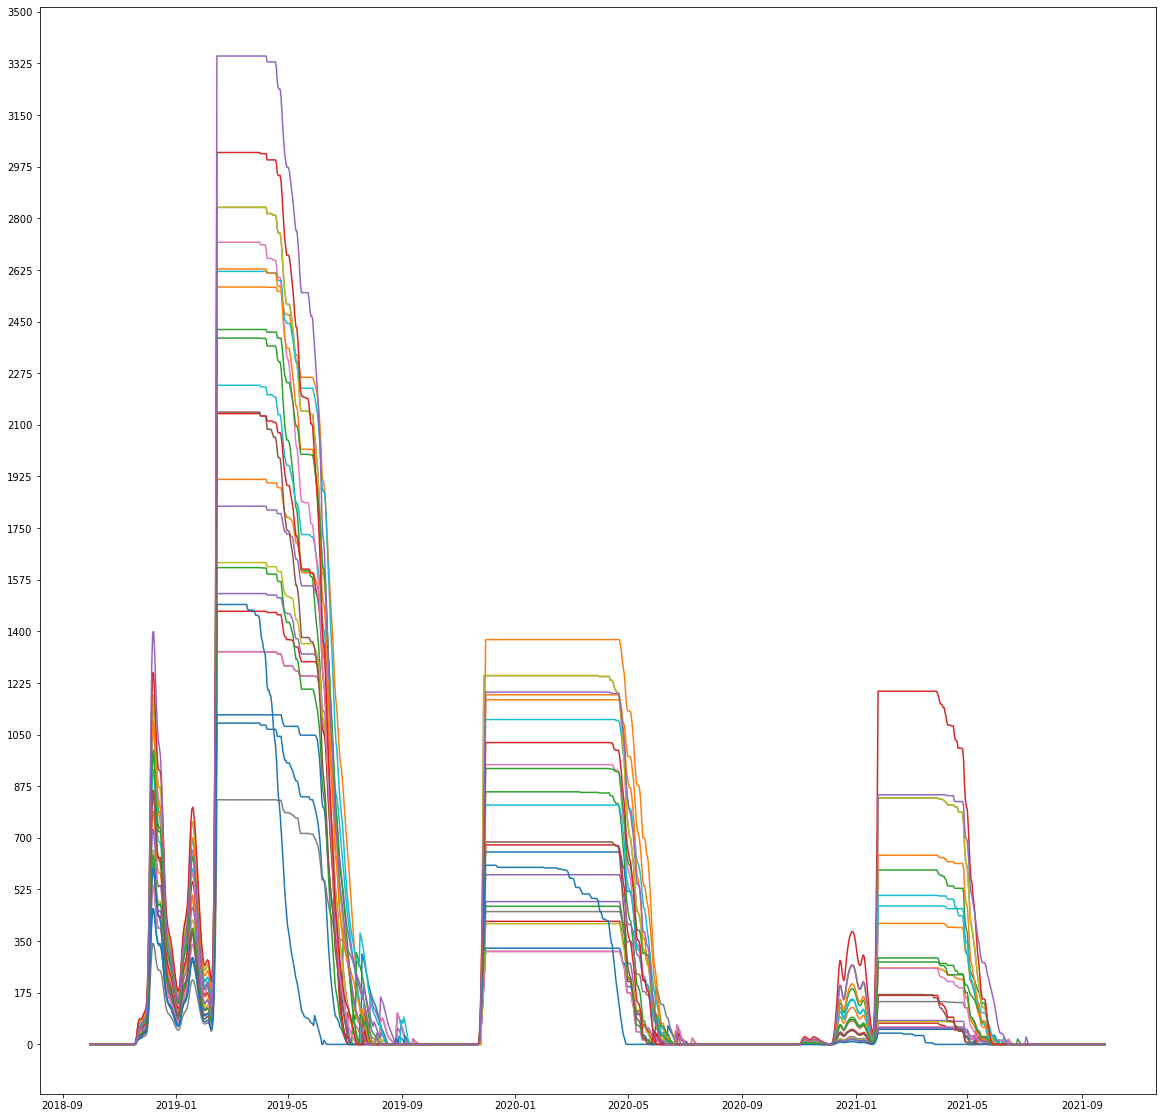

In [27]:
number_of_labels = 20
max_val = 3500
y_axis_label_values = range(0, int(round(max_val + 5, 2)), int(round(max_val/number_of_labels, 2)))

plt.figure(figsize =(20,20))
#plt.plot(dates, pond_data[17])
for pond in pond_data:
    plt.plot(dates, pond)
plt.yticks(y_axis_label_values)
plt.show